## Topic Modeling with Sklearn


### `크롤링한 네이버 뉴스`를 이용하여 topic modeling을 학습

### Topic Modeling이란?

참조: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/

토픽모델링은 텍스트 형태로 되어 있는 다수의 문서들로부터 공통적으로 내재되어 있는 주제들을 추출하기 위한 방법론이다. <br>
토픽모델링의 기본적인 가정은, 저자들이 문서를 작성할 때 먼저 특정한 주제들을 정하고 나서 그러한 주제들로부터 문장을 구성한다는 것이다. 따라서 문서를 구성하는 단어들은 그 주제들로부터 파생되어진 것으로 볼 수 있으며, 토픽모델링은 문서와 단어들에 대해 통계적인 추론을 수행하여 본래의 주제들을 찾아내는 방법이라고 할 수 있다.  <br>
이러한 작업을 하기 위해서는 먼저 자연어로 기술되어 있는 문서들에 대해 형태소 분석을 함으로써 문장들을 개별 단어로 분리해야 한다. 
 <br>
토픽모델링의 가장 대표적인 알고리즘은 LDA(Latent Dirichlet Allocation)로 알려져 있다.  <br>
LDA는 Blei et al. (2003)에 의해 제안된 알고리즘으로, 앞서 설명한 바와 같이, 확률기법을 기반으로 하여 문서의 토픽 분포를 추론한다.  <br>
LDA에서 토픽은 주제를 의미하는 용어로 사용되며, 각 문서들이 특정한 주제에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포가 주어졌을 때, 이 두 확률분포를 조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산해낸다.  <br>
아래 그림에서 θ는 문서들이 각 주제들에 속할 확률분포를 나타내며 디리클레분포의 매개변수인 α에 의해 결정된다.  <br>
그림에서 N은 특정 문서에 속한 단어의 집합이며, M은 전체 문서의 집합을 나타낸다. z는 문서 내의 단어들이 주제들에 속할 확률분포를 나타내며, 이는 θ에 의한 다항분포로 선택된다.  <br>
β는 각 주제가 특정 단어를 생성할 확률을 나타내는 확률분포이며, 결국 z와 β에 의해 실제 문서들의 단어분포인 w가 결정된다.  <br>
이 모형에서 w만이 실제로 문서들을 통해 주어진 분포이고 나머지는 모두 잠재변수이다.  <br>
LDA 알고리즘에서는 주어진 문서와 토픽들의 사전확률 분포인 α와 토픽 내에서 단어의 사전확률분포인 β의 파라미터 값을 활용해 반복적인 시뮬레이션을 통해 z와 θ를 추정한다. 

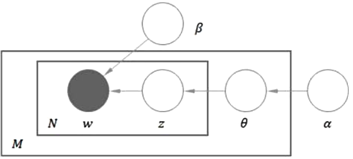



#### 크롤링한 뉴스 데이터를 불러온다.

In [5]:
import csv
text = []
y = []

with open('navernews_utf.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[2]) > 10: #기사 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[2]) # 네이버 뉴스 기사 text 리스트에 추가
            y.append(row[1]) #뉴스이름을 text 리스트에 추가

In [26]:
print('기사 수:', len(text))
print('뉴스 :', set(y))

기사 수: 3864
뉴스 : {'머니투데이', '스포츠서울', '뉴시스', '한국일보', '경향신문', '파이낸셜뉴스', '아시아경제', '데일리안', '한겨레', '헤럴드경제', '노컷뉴스', '아이뉴스24', '뉴스1', '동아일보', '국민일보', '디지털타임스', '연합뉴스', 'TV조선', '한국경제', '이데일리', '서울경제', '조선일보', '전자신문', '세계일보', '매일신문'}


In [7]:
text[:10]

['[앵커]민주당 원내대표 후보로 김태년, 노웅래, 이인영 의원이 등록했습니다. 후보들은 촛불 정신을 이어, 총선 압승을 이끌겠다고 한 목소리를 냈습니다. 김미선 기자입니다.[리포트]오는 8일 치러지는 더불어민주당 원내대표 경선 후보로 이인영, 노웅래, 김태년 의원이 등록했습니다. 촛불 정신을 강조하며, 이인영 "촛불 정신을 완성하고" 노웅래 "촛불 정신의 초심" 김태년 "촛불의 국민 승리를" 총선승리를 이끌겠다고 다짐했습니다. 일찌감치 지난달 21일 출마 선언을 한 이인영 의원은 "보궐선거에서 나타난 경고를 혁신의 기회로 만들어야 한다"며 당청 관계에서 당의 역할을 높이겠다고 선언했습니다.이인영 / 더불어민주당 의원(지난달 21일)"총선 승리를 위한 미드필더가 되어 중원으로 나가겠습니다." 노웅래 의원은 \'중도진보 포용\'을 내세워 \'통합된 원팀\'으로 총선 승리를 이루겠다고 했습니다. 노웅래 / 더불어민주당 의원(어제)"총선승리에 \'올인\' 한다는 결연한 각오로 원내대표 당락과 상관없이 상임위원장 자리는 내려놓겠습니다" 친문 주류 김태년 의원은 경륜을 내세워 자신이 총선 승리를 이루고 파행 상태인 정국을 풀 적임자라고 강조했습니다. 김태년 / 더불어민주당 의원(어제) "(나경원 원내대표) 협상 거부하지 마시고 투쟁만 하지 마시고, 대화하고 협상해서 국민이 바라는 합리적 결과를.."차기 원내대표는 총선에 영향을 미칠 수도 있습니다. 공식 선거운동 기간은 선거일 전날인 오는 7일까지입니다. TV조선 김미선입니다. ☞ 네이버 메인에서 TV조선 구독하기☞ 더 많은 TV조선 뉴스 보기☞ TV조선 뉴스 홈페이지 바로가기* 뉴스제보 : 이메일(tvchosun@chosun.com), 카카오톡(tv조선제보), 전화(1661-0190)김미선 기자(kmsdoo@chosun.com)- Copyrights ⓒ TV조선. 무단전재 및 재배포 금지 -',
 '[앵커]자유한국당은 신속처리 안건 지정에 반발해, 전국을 돌며 장외투쟁에 나서기로 했습니다. 광화문에선 천막 농성도 검토

#### 한글 처리를 위해서는 konlpy가 필요

topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [8]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [9]:
review_cv.shape

(3864, 1000)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [11]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (3864, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [13]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 고, 한국, 등, 청원, 국민, 노동, 의원, 며, 이, 민주당
Topic #1: 전, 사회, 문, 회, 원로, 고, 간담, 말, 국정, 오찬
Topic #2: 치매, 문, 센터, 고, 안심, 어르신, 가족, 말, 며, 수
Topic #3: 경제, 정부, 평가, 정책, 등, 문, 일자리, 성장, 취임, 소득
Topic #4: 문, 고, 검찰, 대담, 경찰, 말, 수석, 수, 대해, 개혁
Topic #5: 연합뉴스, 어린이, 영상, 홈, 오늘, 뭐, 쇼, 행사, 채널, 초청
Topic #6: 뉴시스, 언론, 저작권, 공감, 통신사, 대사, 정책, 관, 청년, 비서
Topic #7: 사람, 수, 평화, 한국, 한반도, 세계, 국민, 시민, 우리, 국가
Topic #8: 트럼프, 북한, 식량, 통화, 지원, 미국, 정상, 고, 대해, 대북
Topic #9: 북한, 발사, 발사체, 고, 미사일, 대화, 단거리, 문, 상황, 날



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [14]:
twitter_tag.nouns(text[1])

['앵커',
 '자유',
 '한국',
 '신속',
 '처리',
 '안건',
 '지정',
 '반발',
 '전국',
 '돌',
 '장외',
 '투쟁',
 '광화문',
 '천막',
 '농성',
 '검토',
 '추경',
 '예산',
 '민생',
 '법안',
 '민주당',
 '이제',
 '협상',
 '고',
 '최원',
 '국',
 '기자',
 '리포트',
 '나경원',
 '자유',
 '한국',
 '원내대표',
 '신속',
 '처리',
 '안건',
 '지정',
 '한국',
 '장외',
 '투쟁',
 '다짐',
 '나경원',
 '헌법',
 '수호',
 '투쟁',
 '결코',
 '국회',
 '광장',
 '결사',
 '항전',
 '방위',
 '결사',
 '항전',
 '투쟁',
 '어가',
 '도부',
 '상복',
 '의원',
 '총회',
 '장',
 '민주주의',
 '글씨',
 '박대출',
 '의원',
 '삭발',
 '참석',
 '황교안',
 '대표',
 '광화문',
 '광장',
 '천막',
 '설치',
 '투쟁',
 '말',
 '황교안',
 '자유',
 '한국',
 '대표',
 '마음',
 '제도',
 '처벌',
 '방식',
 '처벌',
 '독재',
 '폐해',
 '지금',
 '직접',
 '경험',
 '전국',
 '주요',
 '도시',
 '돌',
 '호소',
 '것',
 '검토',
 '민주당',
 '산불',
 '일자리',
 '대책',
 '등',
 '원',
 '추경',
 '예산',
 '처리',
 '걱정',
 '이제',
 '협상',
 '며',
 '한국',
 '이해찬',
 '민주당',
 '대표',
 '법안',
 '상정',
 '자동',
 '법안',
 '건',
 '대화',
 '소통',
 '민주당',
 '국회',
 '정상화',
 '한국',
 '의원',
 '등',
 '대한',
 '고발',
 '별개',
 '입장',
 '국회',
 '사무',
 '처',
 '어제',
 '이름',
 '거론',
 '사실',
 '한국',
 '의원',
 '당직',
 '겨냥',
 '검찰',
 '고발',
 '조치',


In [15]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [16]:
tokenizer(text[1])

['앵커',
 '자유',
 '한국',
 '신속',
 '처리',
 '안건',
 '지정',
 '반발',
 '전국',
 '장외',
 '투쟁',
 '광화문',
 '천막',
 '농성',
 '검토',
 '추경',
 '예산',
 '민생',
 '법안',
 '민주당',
 '이제',
 '협상',
 '최원',
 '기자',
 '리포트',
 '나경원',
 '자유',
 '한국',
 '원내대표',
 '신속',
 '처리',
 '안건',
 '지정',
 '한국',
 '장외',
 '투쟁',
 '다짐',
 '나경원',
 '헌법',
 '수호',
 '투쟁',
 '결코',
 '국회',
 '광장',
 '결사',
 '항전',
 '방위',
 '결사',
 '항전',
 '투쟁',
 '어가',
 '도부',
 '상복',
 '의원',
 '총회',
 '민주주의',
 '글씨',
 '박대출',
 '의원',
 '삭발',
 '참석',
 '황교안',
 '대표',
 '광화문',
 '광장',
 '천막',
 '설치',
 '투쟁',
 '황교안',
 '자유',
 '한국',
 '대표',
 '마음',
 '제도',
 '처벌',
 '방식',
 '처벌',
 '독재',
 '폐해',
 '지금',
 '직접',
 '경험',
 '전국',
 '주요',
 '도시',
 '호소',
 '검토',
 '민주당',
 '산불',
 '일자리',
 '대책',
 '추경',
 '예산',
 '처리',
 '걱정',
 '이제',
 '협상',
 '한국',
 '이해찬',
 '민주당',
 '대표',
 '법안',
 '상정',
 '자동',
 '법안',
 '대화',
 '소통',
 '민주당',
 '국회',
 '정상화',
 '한국',
 '의원',
 '대한',
 '고발',
 '별개',
 '입장',
 '국회',
 '사무',
 '어제',
 '이름',
 '거론',
 '사실',
 '한국',
 '의원',
 '당직',
 '겨냥',
 '검찰',
 '고발',
 '조치',
 '조선',
 '최원',
 '네이버',
 '메인',
 '조선',
 '구독',
 '조선',
 '뉴스',
 '보기',
 '조선',
 '뉴스',


'적'과 같이 한 자로 된 단어를 제거하고 count vector 생성

In [17]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [18]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 경제, 일자리, 성장, 소득, 정부, 고용, 주도, 혁신, 경제정책, 성과
Topic #1: 정책, 정부, 과제, 성과, 추진, 위원회, 변화, 위원장, 기획, 실장
Topic #2: 동아일보, 반도체, 지난해, 세대, 정부, 시스템, 기업, 단독, 산업, 위해
Topic #3: 미국, 브라질, 시간, 나루, 보우, 행사, 교육, 위해, 현지, 올해
Topic #4: 오후, 채널, 오늘, 전달, 상균, 연합뉴스, 제공, 영상, 지난, 설명
Topic #5: 청년, 회의, 대표, 위원회, 통상, 협의, 장관, 업무, 위원, 차관
Topic #6: 원내대표, 민주당, 의원, 국회, 대표, 회의실, 이인영, 여의도, 신임, 토론회
Topic #7: 직접, 마련, 헤럴드경제, 감사, 총리, 관심, 페이스북, 할머니, 그동안, 통해
Topic #8: 관련, 수사, 사건, 경우, 검찰, 피해자, 대한, 당시, 대해, 조치
Topic #9: 사진, 연합뉴스, 제공, 채널, 자료, 지난, 설명, 오늘, 영상, 모습
Topic #10: 평가, 부정, 긍정, 지지율, 포인트, 한국, 국정, 응답, 결과, 조사
Topic #11: 사람, 한국, 평화, 한반도, 세계, 광주, 질서, 국가, 국민, 나라
Topic #12: 뉴시스, 통신사, 공감, 저작권, 언론, 박진희, 전신, 시세, 빅데이터, 주가
Topic #13: 한국, 국회, 트랙, 패스트, 처리, 지정, 여야, 자유, 대표, 안건
Topic #14: 대사, 신임장, 중국, 수여, 장하, 본관, 외교부, 신임, 남관, 왼쪽
Topic #15: 북한, 북미, 대화, 정상회담, 비핵화, 남북, 한반도, 미국, 회담, 김정은
Topic #16: 서비스, 활동, 노컷뉴스, 춘추관, 발달장애, 부모, 장애인, 요구, 도입, 시도
Topic #17: 문제, 관계, 일본, 생각, 과거, 때문, 발전, 양국, 정치, 국내
Topic #18: 조선, 바로가기, 전화, 제보, 홈페이지, 한국, 메인, 보기, 취재, 오늘
T

50개의 topic들을 대상으로 clustering을 수행해서 topic들이 잘 묶을 수 있는지 확인

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 2 0 0 0 0]


T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([ 48.91141  ,  -4.7025714,   1.9565814,  25.215881 , -13.599938 ,
        -4.5226607, -43.66287  ,  -0.6359522, -10.579671 ,  13.918764 ,
       -37.38124  ,  67.73785  , -56.47292  ,   9.960046 ,  31.184013 ,
         6.5688725, -16.198141 ,  41.741985 ,  -4.1491294,  26.522762 ,
       -67.439735 ,   7.255467 ,  52.407    ,  13.14288  , -39.05863  ,
        20.433344 ,  45.55296  , -35.835663 ,  27.541893 ,   2.2424552,
        46.983124 , -26.278795 ,  11.3236685, -24.2321   ,  -8.757177 ,
       -19.70464  ,  61.818874 ,  19.644676 , -63.22291  , -12.626607 ,
        33.39131  ,  13.094208 ,  -2.7162936, -32.71362  , -42.947605 ,
        24.026094 ,  24.300797 , -20.974653 , -26.747818 , -10.368649 ],
      dtype=float32)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

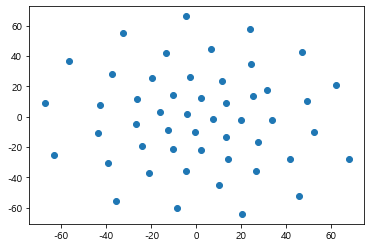

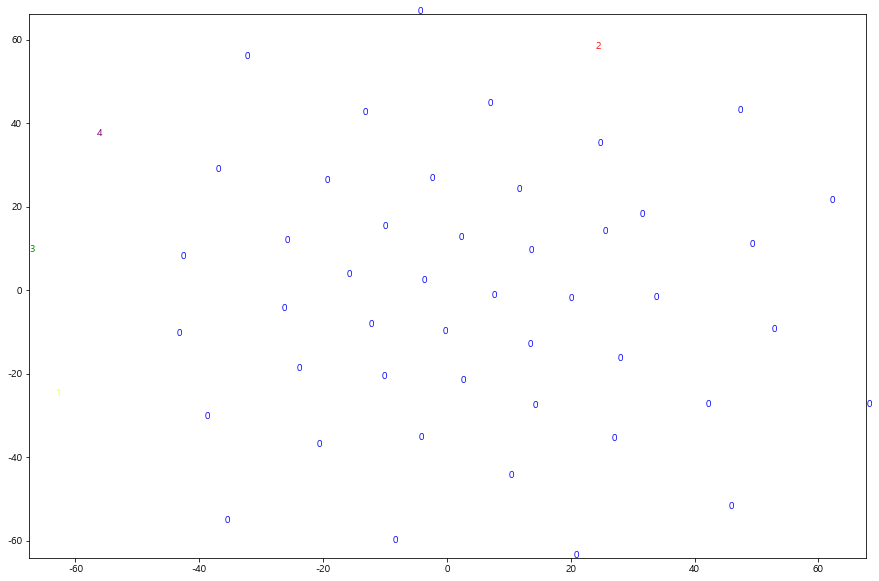

In [22]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.<br>
낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음<br>
http://qpleple.com/perplexity-to-evaluate-topic-models/ <br>
그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감<br>
반복횟수는 5,000번 정도면 수렴

In [23]:
lda.perplexity(review_cv)

328.212530268355

In [24]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 정책, 정부, 경제, 소득, 성과, 일자리, 최저임금, 인상, 고용, 과제
Topic #1: 청원, 국민, 한국, 해산, 의원, 답변, 정당, 기준, 동의, 자유
Topic #2: 경찰, 검찰, 수석, 수사권, 개혁, 조정, 우려, 입장, 대한, 총장
Topic #3: 트럼프, 통화, 정상, 미국, 대변인, 대해, 방한, 논의, 방안, 도널드
Topic #4: 어린이, 행사, 초청, 어린이날, 산불, 기념, 아동, 소방관, 피해, 집무실
Topic #5: 정책, 청년, 원내대표, 민주당, 비서, 회의, 대표, 의원, 장관, 국회
Topic #6: 뉴시스, 저작권, 언론, 공감, 통신사, 전신, 머니투데이, 박진희, 빅데이터, 시세
Topic #7: 경제, 시민, 아시아, 메인, 채널, 관리, 추가, 노무현, 최고, 통해
Topic #8: 인사, 검증, 장관, 관련, 대해, 부분, 국민, 실패, 과정, 때문
Topic #9: 대담, 취임, 주년, 특집, 출연, 상춘, 질문, 진행, 하루, 인터뷰
Topic #10: 평가, 부정, 긍정, 지지율, 포인트, 한국, 국정, 결과, 정책, 조사
Topic #11: 사람, 한국, 평화, 한반도, 세계, 광주, 국민, 국가, 질서, 촛불
Topic #12: 치매, 센터, 안심, 어르신, 여사, 가족, 금천구, 김정숙, 방문, 카네이션
Topic #13: 국회, 한국, 트랙, 패스트, 여야, 대표, 자유, 처리, 원내대표, 지정
Topic #14: 대사, 오후, 신임장, 중국, 수여, 신임, 참석, 장하, 외교, 본관
Topic #15: 정상회담, 한반도, 북미, 대북, 대표, 북한, 비핵화, 지원, 한미, 식량
Topic #16: 지역, 전국, 서비스, 활동, 춘추관, 노컷뉴스, 장애인, 발달장애, 부모, 요구
Topic #17: 노동, 정부, 관계, 우리, 사회, 과거, 문제, 세상, 발전, 일본
Topic #18: 연합뉴스, 오늘, 채널, 조선, 메인, 오전, 포럼, 코리아, 제공, 영상
Topic #

348.8295865737118

In [25]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 정책, 경제, 정부, 노동, 청년, 일자리, 소득, 성장, 최저임금, 사회
Topic #1: 한국, 청원, 원내대표, 민주당, 국회, 국민, 대표, 의원, 자유, 비서
Topic #2: 검찰, 경찰, 개혁, 수석, 평가, 수사권, 조정, 부정, 대한, 법안
Topic #3: 치매, 센터, 안심, 어르신, 방문, 이데일리, 가족, 여사, 금천구, 방한
Topic #4: 연합뉴스, 어린이, 행사, 오늘, 영상, 채널, 초청, 어린이날, 산불, 조선
Topic #5: 사람, 평화, 한국, 한반도, 세계, 시민, 국민, 국가, 광주, 질서
Topic #6: 뉴시스, 저작권, 언론, 공감, 통신사, 대사, 전신, 머니투데이, 박진희, 오후
Topic #7: 사회, 원로, 간담, 오찬, 장관, 초청, 위원장, 교수, 정책, 환경부
Topic #8: 대해, 대담, 생각, 문제, 취임, 특집, 정부, 주년, 때문, 정치
Topic #9: 북한, 발사, 발사체, 식량, 트럼프, 대해, 통화, 대화, 지원, 한미



358.01412582025074